In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

In [2]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [3]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import time

In [4]:
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [5]:
import shap

## Load dataset

In [7]:
path_out = r'F:\Codes\joint attention\Nano-particle\output_new_new'

file_path_features_norm = os.path.join(path_out , 'features_normalized_35.npy')
file_path_labels = os.path.join(path_out , 'label_r_avg_raw.npy')
file_path_features_original = os.path.join(path_out , 'features_raw_35.npy')

with open( file_path_features_original , 'rb') as f:
    features_orig = np.load(f)
with open( file_path_labels , 'rb') as f:
    labels = np.load(f)
with open( file_path_features_norm , 'rb') as f:
    features_norm = np.load(f)

print(features_orig.shape)
print(labels.shape)
print(features_norm.shape)

(3999, 35)
(3999, 1)
(3999, 35)


## Visualize data

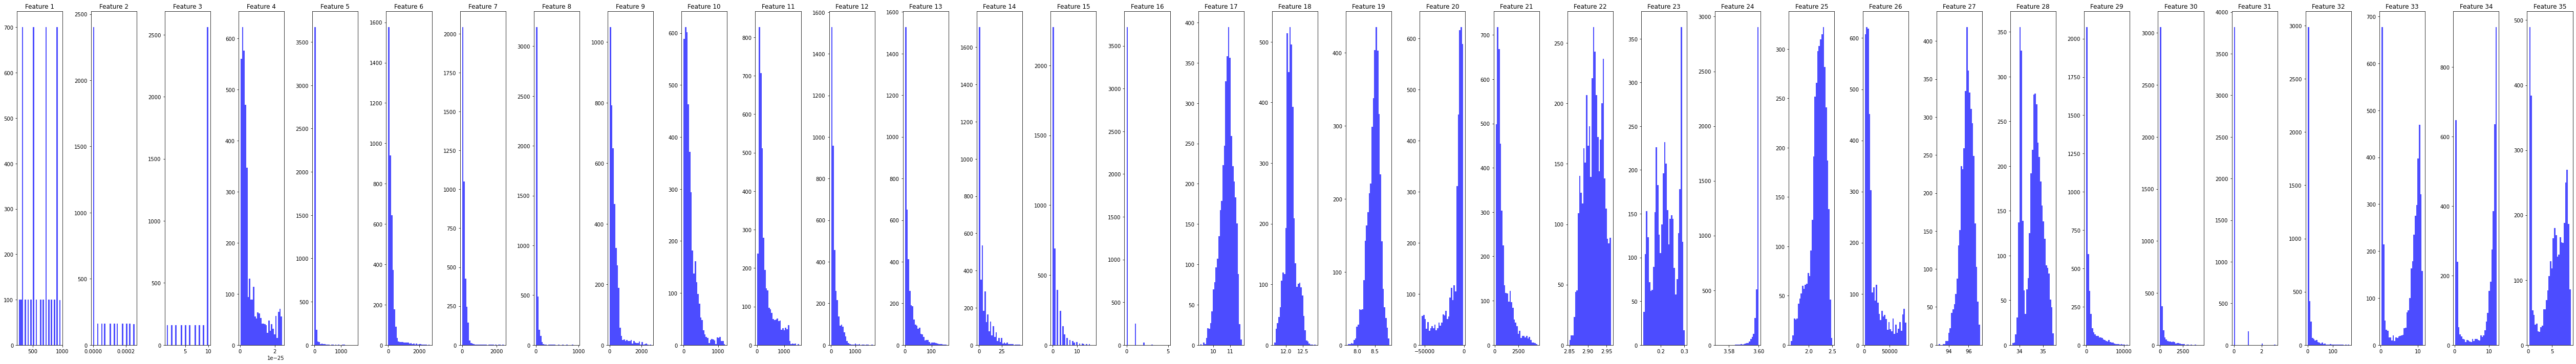

In [8]:
data = features_orig
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

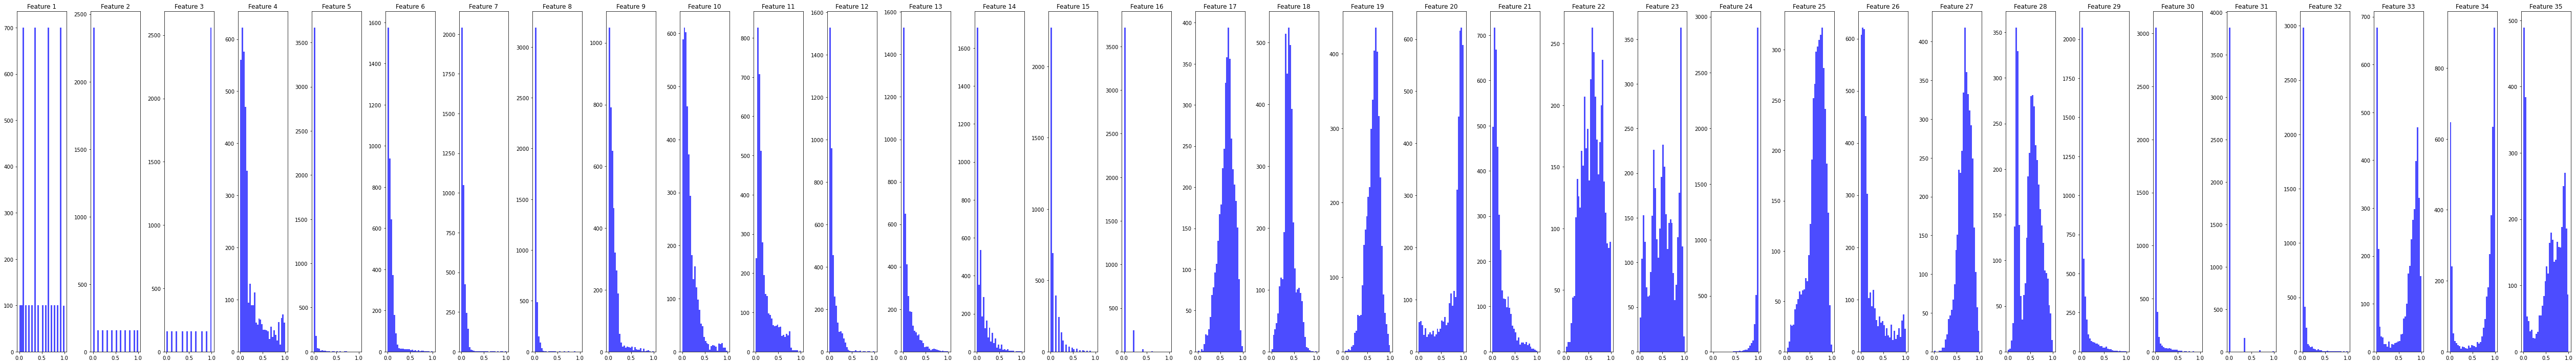

In [9]:
data = features_norm
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

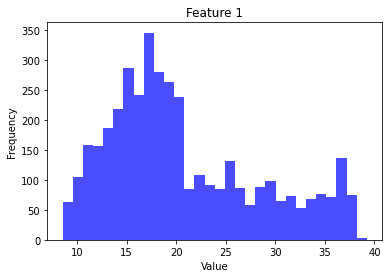

In [10]:
data = labels
plt.hist(data[:, 0], bins=30, color='blue', alpha=0.7)
plt.title('Feature 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Split the dataset into train , test and validation splits

In [11]:
# Split data into train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features_norm, labels, test_size=0.2, random_state=42)

print(f"features train shape: {features_train.shape}")
print(f"features test shape: {features_test.shape}") # tmp 
print(f"labels train shape: {labels_train.shape}")
print(f"labes test shape: {labels_test.shape}") # tmp

print(f"features train type: {type(features_train)}")
print(f"features test type: {type(features_test)}")
print(f"labels train type: {type(labels_train)}")
print(f"labes test type: {type(labels_test)}")

#test set again split into actual test and validation sets
features_validation, features_test, labels_validation, labels_test = train_test_split(features_test, labels_test, test_size=0.5, random_state=42)

print(f"features validation shape: {features_validation.shape}")
print(f"features test shape: {features_test.shape}")
print(f"labels validation shape: {labels_validation.shape}")
print(f"labes test shape: {labels_test.shape}")

print(f"features validation type: {type(features_validation)}")
print(f"features test type: {type(features_test)}")
print(f"labels validation type: {type(labels_validation)}")
print(f"labes test type: {type(labels_test)}")

features train shape: (3199, 35)
features test shape: (800, 35)
labels train shape: (3199, 1)
labes test shape: (800, 1)
features train type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels train type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>
features validation shape: (400, 35)
features test shape: (400, 35)
labels validation shape: (400, 1)
labes test shape: (400, 1)
features validation type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels validation type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>


## Model Training

In [12]:
def calc_MAPE_Percentage(actual_list , predicted_list):
#     assert len(predicted_list.shape) ==2
#     assert isinstance(predicted_list, list)
    assert len(actual_list.shape) == 2
    tmp=0
    num_samples = actual_list.shape[0]
        
    if len(predicted_list.shape) == 2:
#         print('con1')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i,0]))/(np.abs(actual_list[i,0]))
    elif len(predicted_list.shape) == 1:
#         print('con2')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i]))/(np.abs(actual_list[i,0])) 
    else:
        raise AssertionError
    MAPD = tmp/num_samples
    MAPD_perc = MAPD*100
    return MAPD_perc
    

## XG Boost (New- scikit API)

In [12]:
grid_search.best_score_

-0.04445449751721907

In [14]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split

# Assuming X and y are your features and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
predictions_list = {'train':None,'test':None,'val':None}
name = 'XGBoost'

# Define your XGBoost regressor model
model_xgb = xgb.XGBRegressor(colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 5, n_estimators= 300, subsample= 0.8, random_state = 42)


# Run grid search
training_start = time.time()
model_xgb.fit(features_train, labels_train)
training_end = time.time()

# Evaluate results
# print("Best parameters found: ", grid_search.best_params_)
# best_rmse = (-grid_search.best_score_)**0.5  # Convert MSE to RMSE
# print("Best RMSE found: ", best_rmse)


val_start = time.time()
y_pred_validation = model_xgb.predict(features_validation)
val_end = time.time()
predictions_list['val'] = y_pred_validation

y_pred_train = model_xgb.predict(features_train)
predictions_list['train'] = y_pred_train

testing_start = time.time()
y_pred_test = model_xgb.predict(features_test)
# y_pred = rf_best.predict(features_test)
testing_end = time.time()
predictions_list['test'] = y_pred_test

#metrics for train, test and validation
val_rmse = mean_squared_error(labels_validation, predictions_list['val'], squared = False)
val_mse = mean_squared_error(labels_validation, predictions_list['val'], squared = True)
val_mae = mean_absolute_error(labels_validation, predictions_list['val'])
val_mapd = calc_MAPE_Percentage(labels_validation,predictions_list['val']) 
val_r2 = r2_score(labels_validation, predictions_list['val'])
print(f"Validation set with {name} - RMSE: {val_rmse:.10f}, MSE: {val_mse:.10f}, MAE: {val_mae:.10f} , MAPD: {val_mapd:.10f}, R^2: {val_r2:.10f}")

train_rmse = mean_squared_error(labels_train, predictions_list['train'], squared = False)
train_mse = mean_squared_error(labels_train, predictions_list['train'], squared = True)
train_mae = mean_absolute_error(labels_train, predictions_list['train'])
train_mapd = calc_MAPE_Percentage(labels_train,predictions_list['train']) 
train_r2 = r2_score(labels_train, predictions_list['train'])
print(f"Train set with {name} - RMSE: {train_rmse:.10f}, MSE: {train_mse:.10f}, MAE: {train_mae:.10f}, MAPD: {train_mapd:.10f}, R^2: {train_r2:.10f}")

test_rmse = mean_squared_error(labels_test, predictions_list['test'], squared = False)
test_mse = mean_squared_error(labels_test, predictions_list['test'], squared = True)
test_mae = mean_absolute_error(labels_test, predictions_list['test'])
test_mapd = calc_MAPE_Percentage(labels_test,predictions_list['test']) 
test_r2 = r2_score(labels_test, predictions_list['test'])
print(f"Test set with {name} - RMSE: {test_rmse:.10f}, MSE: {test_mse:.10f}, MAE: {test_mae:.10f}, MAPD: {test_mapd:.10f},  R^2: {test_r2:.10f}")

print("Time taken for training: {:.10f} seconds".format(training_end - training_start)) 
print("Time taken for testing: {:.10f} seconds".format(testing_end - testing_start))
print("Time taken for validation: {:.10f} seconds".format(val_end - val_start))


Validation set with XGBoost - RMSE: 0.1634051603, MSE: 0.0267012464, MAE: 0.0987243424 , MAPD: 0.5104278060, R^2: 0.9995195366
Train set with XGBoost - RMSE: 0.0400114327, MSE: 0.0016009147, MAE: 0.0306243791, MAPD: 0.1649786264, R^2: 0.9999722879
Test set with XGBoost - RMSE: 0.1532121561, MSE: 0.0234739648, MAE: 0.1021317899, MAPD: 0.4944572847,  R^2: 0.9996125719
Time taken for training: 0.5141851902 seconds
Time taken for testing: 0.0010015965 seconds
Time taken for validation: 0.0020012856 seconds


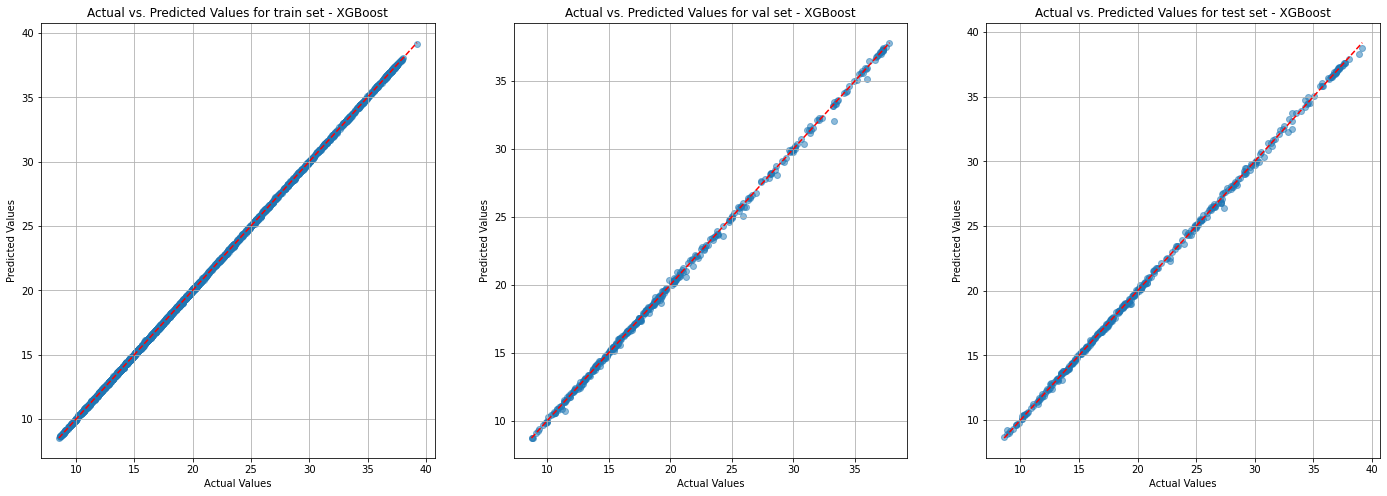

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns
set_d = ['train', 'val','test']
labels_set = [labels_train.squeeze(), labels_validation.squeeze(), labels_test.squeeze()]

for i in range(3):
    axs[i].scatter(labels_set[i], predictions_list[set_d[i]], alpha=0.5)
    axs[i].set_title(f"Actual vs. Predicted Values for {set_d[i]} set - XGBoost")
    axs[i].set_xlabel("Actual Values")
    axs[i].set_ylabel("Predicted Values")

    min_val = min(np.min(labels_set[i]), np.min(predictions_list[set_d[i]]))
    max_val = max(np.max(labels_set[i]), np.max(predictions_list[set_d[i]]))
    axs[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    axs[i].grid(True)
plt.show()

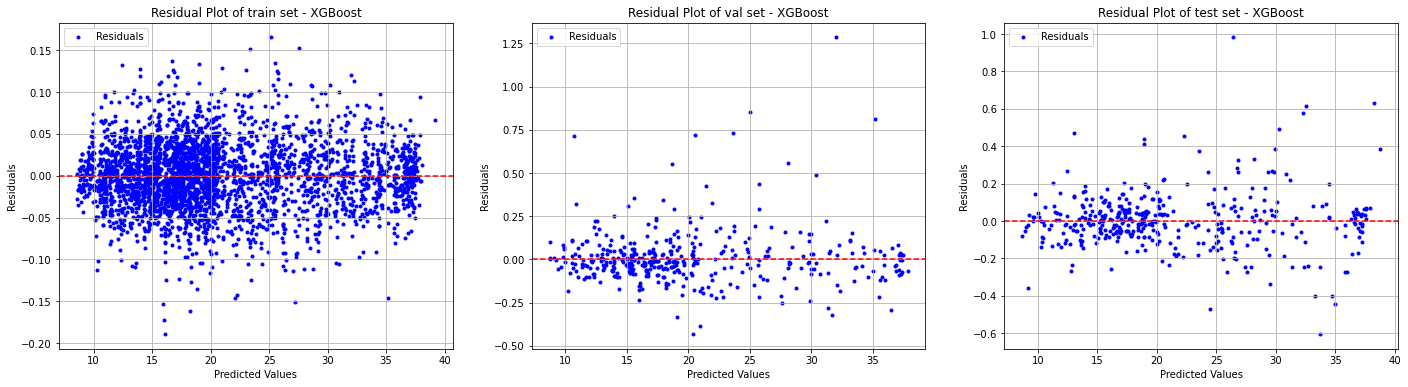

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals
    
#     plt.figure(figsize=(8, 6))
    axs[i].scatter(predictions_list[set_d[i]], residuals, color='blue', marker='.', label='Residuals')
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set - XGBoost')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

3199
400
400


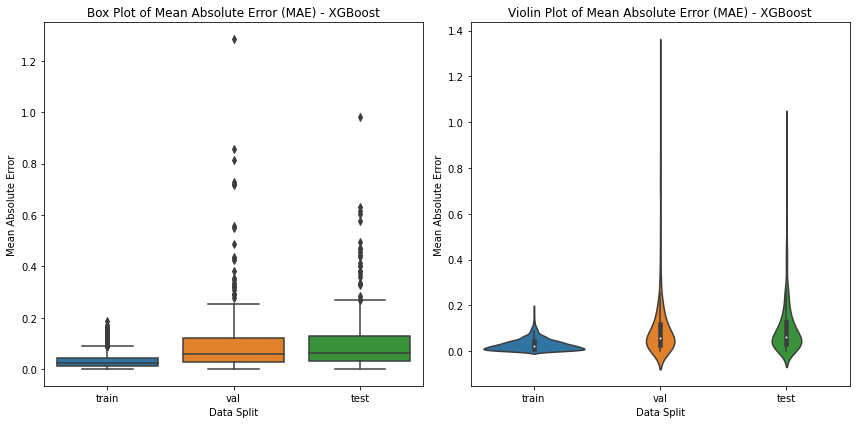

In [17]:
#train, test, val
df_list =[]
for i in range(3):
    num_samples = residuals_set[set_d[i]].shape[0]
    print(num_samples)
    mae_values = [abs(residuals_set[set_d[i]][j]) for j in range(num_samples)]
    df_list.append(pd.DataFrame(mae_values, columns=['MAE']))
    df_list[i]['Data Split'] = set_d[i]

combined_mae_df = pd.concat([df_list[0], df_list[1], df_list[2]])
    
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1) 
sns.boxplot(x='Data Split', y='MAE', data=combined_mae_df)
# sns.boxplot(data=mae_df, y='MAE')
plt.title('Box Plot of Mean Absolute Error (MAE) - XGBoost')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

# Violin plot
plt.subplot(1, 2, 2)  
# sns.violinplot(data=mae_df, y='MAE')
sns.violinplot(x='Data Split', y='MAE', data=combined_mae_df)
plt.title('Violin Plot of Mean Absolute Error (MAE) - XGBoost')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

In [18]:
col_names_str = "T, tau, time, Volume, S_100, S_111, S_110, S_311, Curve_1-10, Curve_11-20, Curve_21-30, Curve_31-40, Curve_41-50, Curve_51-60, Curve_61-70, Curve_71-80, Avg_total, Avg_bulk, Avg_surf, Total_E, Formation_E, Avg_bonds, Std_bonds, Max_bonds, Min_bonds, N_bonds, angle_avg, angle_std, FCC, HCP, ICOS, DECA, q6q6_avg_total, q6q6_avg_bulk, q6q6_avg_surf"
cols = col_names_str.split(',')
cols =[c.strip() for c in cols]
# print(cols)
cols_np = np.array(cols)
print(cols_np)
print(cols_np.shape)

['T' 'tau' 'time' 'Volume' 'S_100' 'S_111' 'S_110' 'S_311' 'Curve_1-10'
 'Curve_11-20' 'Curve_21-30' 'Curve_31-40' 'Curve_41-50' 'Curve_51-60'
 'Curve_61-70' 'Curve_71-80' 'Avg_total' 'Avg_bulk' 'Avg_surf' 'Total_E'
 'Formation_E' 'Avg_bonds' 'Std_bonds' 'Max_bonds' 'Min_bonds' 'N_bonds'
 'angle_avg' 'angle_std' 'FCC' 'HCP' 'ICOS' 'DECA' 'q6q6_avg_total'
 'q6q6_avg_bulk' 'q6q6_avg_surf']
(35,)


In [19]:
pd.options.display.max_columns = None
features_train_df = pd.DataFrame(features_train, columns=cols)
features_train_df.head()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.357143,0.0,1.0,0.121008,0.057915,0.107854,0.020307,0.029928,0.148205,0.102843,0.059438,0.001174,0.000000,0.000000,0.0,0.0,0.666721,0.328632,0.563220,0.881721,0.097807,0.392482,0.266821,0.996049,0.818133,0.115757,0.797784,0.641690,0.074483,0.056823,0.0,0.060976,0.907309,0.952472,0.863790
1,0.071429,0.0,1.0,0.094118,0.000000,0.140549,0.044758,0.033024,0.139037,0.069398,0.059438,0.021139,0.000000,0.000000,0.0,0.0,0.604777,0.326268,0.700351,0.906289,0.061205,0.235131,0.082807,0.988147,0.903067,0.089253,0.816472,0.725791,0.059987,0.049144,0.0,0.085366,0.908386,0.949666,0.944866
2,0.928571,0.0,1.0,0.128151,0.000000,0.113115,0.025280,0.002064,0.130634,0.169732,0.062704,0.027598,0.025641,0.022222,0.0,0.0,0.700475,0.471058,0.726992,0.879346,0.161850,0.741993,0.696828,0.998204,0.597269,0.123762,0.668383,0.442706,0.018324,0.016235,0.0,0.012195,0.728838,0.827630,0.562978
3,0.928571,0.0,1.0,0.115126,0.000000,0.051484,0.020721,0.004128,0.081742,0.141304,0.103201,0.042866,0.025641,0.044444,0.0,0.0,0.677566,0.433393,0.627610,0.892252,0.151954,0.756526,0.743001,0.992816,0.549163,0.110572,0.647262,0.485310,0.017322,0.002852,0.0,0.000000,0.664866,0.803323,0.380958
4,0.928571,0.0,1.0,0.006261,0.000000,0.001879,0.010361,0.004128,0.004966,0.051003,0.036577,0.014680,0.019231,0.000000,0.0,0.0,0.267679,0.425648,0.298146,0.994267,0.021339,0.698753,0.959020,0.985273,0.661096,0.005949,0.275268,0.149671,0.000000,0.000000,0.0,0.000000,0.047440,0.050969,0.058316


In [20]:
features_test_df = pd.DataFrame(features_test, columns=cols)
features_test_df.head()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.642857,0.0,1.0,0.137815,0.034106,0.067644,0.030253,0.009288,0.141329,0.089465,0.094056,0.044040,0.025641,0.044444,0.000000,0.0,0.699216,0.434861,0.629781,0.867766,0.144070,0.586346,0.534771,0.970905,0.708974,0.132962,0.709989,0.586149,0.057617,0.015358,0.0,0.000000,0.830782,0.930319,0.641046
1,0.071429,0.0,1.0,0.113025,0.000000,0.197670,0.048902,0.000000,0.198625,0.000836,0.041803,0.037581,0.000000,0.000000,0.000000,0.0,0.634551,0.331812,0.739686,0.887331,0.070192,0.262313,0.068921,0.719828,0.892165,0.107702,0.846525,0.957676,0.097912,0.000000,0.0,0.000000,0.944114,0.984828,0.971144
2,0.928571,0.0,1.0,0.044118,0.000000,0.003382,0.012433,0.007224,0.010313,0.113712,0.081646,0.029360,0.070513,0.022222,0.000000,0.0,0.457858,0.262922,0.443878,0.959670,0.078529,0.798152,0.934918,0.971264,0.556526,0.040876,0.481406,0.177720,0.000000,0.000000,0.0,0.000000,0.024286,0.024908,0.031550
3,1.000000,0.9,0.0,0.021807,0.000000,0.001127,0.003315,0.002064,0.009549,0.078595,0.045069,0.022901,0.089744,0.111111,0.058824,0.0,0.197612,0.026333,0.000000,0.979421,0.037220,0.707365,0.993283,0.946121,0.330810,0.018708,0.444691,0.093384,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.004378
4,0.928571,0.0,1.0,0.158403,0.003218,0.090192,0.018235,0.006192,0.123377,0.184783,0.095363,0.032883,0.070513,0.044444,0.058824,0.0,0.719160,0.418718,0.648071,0.851018,0.195826,0.774468,0.692651,0.993894,0.675868,0.152926,0.685985,0.500107,0.027806,0.018210,0.0,0.036585,0.716461,0.814078,0.491552


In [21]:
# features_train
train_feature_sample_df = shap.utils.sample(features_train_df, 2500)
print(train_feature_sample_df.shape)

LR_model = model_xgb

# explainer__ = shap.Explainer(LR_model.predict, train_feature_sample_df) #this was probly from chatgpt!
explainer__ = shap.Explainer(LR_model, train_feature_sample_df)
shap_values = explainer__(features_test_df)
print(shap_values.feature_names)

(2500, 35)
['T', 'tau', 'time', 'Volume', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_total', 'Avg_bulk', 'Avg_surf', 'Total_E', 'Formation_E', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA', 'q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf']


In [22]:
#shap values converted to a dataframe

print(type(shap_values))
print(type(shap_values.values))
shap_values_df = pd.DataFrame(shap_values.values, columns=cols)
shap_values_abs_df = shap_values_df.abs()
shap_values_df.head()

<class 'shap._explanation.Explanation'>
<class 'numpy.ndarray'>


,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.000150,-0.033407,0.001008,-0.589367,-0.021933,0.002230,-0.022143,0.003236,0.084287,-0.031447,-0.001291,0.000167,-0.022221,-0.001614,0.004094,-0.001344,-0.045730,-0.001647,0.001285,-1.020255,0.048413,0.005541,0.003316,-0.006923,-0.000916,-0.033886,-0.003571,-0.006629,-0.006327,0.021602,-0.000021,0.008896,-0.002879,0.012312,0.003326
1,-0.001810,-0.023126,0.000261,-1.535789,0.030828,0.096612,-0.007330,0.010921,0.182872,-0.061682,-0.021874,-0.003895,-0.107451,-0.012405,0.003421,-0.001337,0.027998,-0.001676,-0.003942,-1.058507,-0.068083,0.017933,0.009150,-0.007653,-0.009350,-0.177866,-0.058413,-0.003354,-0.000191,-0.024407,-0.000021,0.010643,-0.041478,-0.030101,-0.017300
2,0.006104,-0.034488,-0.001793,-5.461365,0.018247,-0.043736,-0.048051,0.000664,-0.149638,-0.032584,-0.006214,-0.003764,0.001410,-0.006568,0.001627,-0.000256,0.099035,-0.007188,0.021985,-1.379237,-0.039634,-0.004940,-0.003660,-0.002814,-0.002037,-0.393881,0.132626,0.001392,-0.009840,-0.001484,-0.000027,0.006854,0.015853,0.002130,-0.006333
3,0.001109,0.103279,0.010306,-7.102270,0.021718,-0.065533,-0.066710,-0.001578,-0.137781,-0.047091,-0.035316,-0.038766,0.008709,0.009137,0.001302,-0.000426,0.148269,-0.001374,0.031291,-1.588356,-0.104324,-0.013956,0.001760,0.001691,0.006936,-0.463195,0.146825,0.033501,-0.006482,-0.017994,-0.000017,0.014793,0.017240,-0.006691,-0.002937
4,0.007608,-0.037619,0.000777,0.172589,-0.012258,0.000768,-0.023653,0.001844,0.026143,0.033014,-0.003880,0.003113,0.005722,-0.003502,0.001891,-0.000955,-0.061604,0.000165,-0.005882,-1.023358,0.086205,-0.004376,-0.001437,-0.002568,0.002450,0.048764,-0.009952,-0.007535,-0.013465,0.025413,-0.000021,0.012269,0.009198,0.015082,0.003033


In [23]:
shap_values_df.describe()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.000102,-0.002824,0.000080,0.124548,0.001539,0.005429,-0.004037,0.001063,0.013495,-0.000124,0.000803,-0.000999,0.000930,0.000441,0.000324,-0.000522,0.000420,-0.000693,0.003593,0.003092,0.018172,0.001626,0.000380,0.000359,0.000388,-0.011783,-0.005772,-0.000174,-0.001064,0.002504,-0.000023,0.001912,-0.002507,-0.000189,-0.000163
std,0.006804,0.052329,0.005727,5.533092,0.018890,0.075347,0.040243,0.010480,0.128732,0.048349,0.016212,0.013882,0.043934,0.012195,0.008269,0.003044,0.084519,0.007732,0.033812,1.690490,0.142824,0.012166,0.004796,0.007901,0.007369,0.570524,0.085985,0.014765,0.011085,0.029311,0.000094,0.016094,0.018995,0.013668,0.008384
min,-0.026479,-0.063709,-0.020251,-9.515579,-0.046459,-0.070391,-0.088925,-0.041977,-0.164533,-0.082844,-0.042156,-0.040091,-0.144383,-0.025667,-0.040856,-0.005259,-0.163563,-0.036131,-0.050483,-2.047500,-0.367025,-0.046822,-0.022669,-0.021804,-0.027305,-0.566500,-0.148171,-0.025132,-0.019453,-0.191034,-0.001674,-0.091113,-0.065597,-0.072211,-0.036863
25%,-0.003665,-0.035255,-0.001917,-4.087491,-0.008854,-0.031941,-0.032140,0.000497,-0.086315,-0.040840,-0.008773,-0.009590,-0.023957,-0.007003,0.001421,-0.001425,-0.075526,-0.005332,-0.011507,-1.263638,-0.067622,-0.004988,-0.002777,-0.004968,-0.002374,-0.283710,-0.076796,-0.008642,-0.008685,-0.007594,-0.000027,0.004194,-0.015345,-0.002684,-0.005086
50%,-0.000161,-0.024175,-0.000203,-1.114238,-0.000862,-0.006694,-0.010841,0.003193,-0.012915,-0.005022,-0.000509,-0.002498,0.000864,-0.001699,0.003153,-0.001006,0.005428,-0.001867,-0.002241,-1.027075,0.029091,0.001620,0.000764,-0.001782,0.000516,-0.184824,-0.023613,-0.004639,-0.004855,-0.000450,-0.000021,0.008325,-0.001866,0.003648,0.000992
75%,0.004052,0.012171,0.001392,3.893056,0.014882,0.017841,0.028945,0.005402,0.089001,0.039291,0.015648,0.006662,0.036636,0.008538,0.004368,-0.000531,0.071956,0.002245,0.010868,1.760741,0.116800,0.009336,0.003445,0.005439,0.002350,-0.033497,0.066635,0.005596,0.004540,0.017553,-0.000021,0.010610,0.013424,0.007525,0.004948
max,0.019211,0.207701,0.027709,11.274731,0.074371,0.871353,0.134018,0.035521,0.641520,0.149993,0.033486,0.050019,0.142596,0.042521,0.013315,0.026127,0.162884,0.027357,0.255150,3.054565,0.471117,0.045487,0.012137,0.026360,0.057407,1.725494,0.192800,0.099957,0.032984,0.162067,0.000441,0.016546,0.036948,0.022105,0.026786


In [24]:
shap_values_abs_df.describe()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.005040,0.041240,0.003611,4.565701,0.014202,0.039021,0.034284,0.007188,0.099098,0.041334,0.012888,0.010640,0.034354,0.009695,0.005673,0.001680,0.074212,0.005945,0.018494,1.558887,0.113107,0.009163,0.003795,0.006211,0.004049,0.377361,0.074267,0.010378,0.009058,0.016831,0.000035,0.012501,0.016106,0.009356,0.006426
std,0.004564,0.032269,0.004443,3.119742,0.012531,0.064655,0.021389,0.007693,0.083123,0.024997,0.009847,0.008957,0.027348,0.007395,0.006019,0.002590,0.040279,0.004984,0.028518,0.649266,0.088908,0.008155,0.002950,0.004887,0.006166,0.427644,0.043560,0.010491,0.006461,0.024112,0.000091,0.010296,0.010346,0.009955,0.005377
min,0.000023,0.000544,0.000006,0.000423,0.000014,0.000102,0.000010,0.000009,0.000200,0.000059,0.000014,0.000050,0.000407,0.000034,0.000093,0.000012,0.000107,0.000012,0.000022,0.068265,0.002049,0.000024,0.000009,0.000029,0.000007,0.012034,0.000425,0.000026,0.000012,0.000055,0.000016,0.000257,0.000058,0.000082,0.000018
25%,0.001177,0.023123,0.000702,2.185229,0.003707,0.009543,0.017692,0.002672,0.043277,0.025911,0.003858,0.004374,0.013392,0.004119,0.002601,0.000644,0.040146,0.002055,0.006331,1.085904,0.046304,0.003236,0.001696,0.002702,0.001324,0.168253,0.041888,0.004869,0.004787,0.004069,0.000021,0.007537,0.010064,0.003396,0.002572
50%,0.003920,0.033133,0.001650,4.062599,0.012180,0.027373,0.030997,0.004396,0.087812,0.040501,0.011058,0.008729,0.028119,0.007915,0.003841,0.001080,0.073404,0.004787,0.011270,1.383694,0.088027,0.006474,0.003322,0.005098,0.002378,0.229861,0.070265,0.008018,0.008063,0.009584,0.000022,0.010059,0.014041,0.006882,0.004986
75%,0.007578,0.047566,0.004757,6.586634,0.019560,0.047522,0.050174,0.009023,0.130031,0.054147,0.020992,0.014771,0.050107,0.013353,0.005236,0.001580,0.107472,0.008607,0.023510,1.921645,0.164441,0.012890,0.005066,0.008164,0.004335,0.447628,0.108631,0.012590,0.011569,0.022831,0.000027,0.012678,0.019971,0.011196,0.009182
max,0.026479,0.207701,0.027709,11.274731,0.074371,0.871353,0.134018,0.041977,0.641520,0.149993,0.042156,0.050019,0.144383,0.042521,0.040856,0.026127,0.163563,0.036131,0.255150,3.054565,0.471117,0.046822,0.022669,0.026360,0.057407,1.725494,0.192800,0.099957,0.032984,0.191034,0.001674,0.091113,0.065597,0.072211,0.036863


In [25]:
sorted_columns = shap_values_abs_df.describe().loc['mean'].sort_values(ascending=False).index
shap_values_abs_df_describe_sorted = shap_values_abs_df.describe()[sorted_columns]
shap_values_abs_df_describe_sorted

,Volume,Total_E,N_bonds,Formation_E,Curve_1-10,angle_avg,Avg_total,Curve_11-20,tau,S_111,Curve_41-50,S_110,Avg_surf,HCP,q6q6_avg_total,S_100,Curve_21-30,DECA,Curve_31-40,angle_std,Curve_51-60,q6q6_avg_bulk,Avg_bonds,FCC,S_311,q6q6_avg_surf,Max_bonds,Avg_bulk,Curve_61-70,T,Min_bonds,Std_bonds,time,Curve_71-80,ICOS
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,4.565701,1.558887,0.377361,0.113107,0.099098,0.074267,0.074212,0.041334,0.041240,0.039021,0.034354,0.034284,0.018494,0.016831,0.016106,0.014202,0.012888,0.012501,0.010640,0.010378,0.009695,0.009356,0.009163,0.009058,0.007188,0.006426,0.006211,0.005945,0.005673,0.005040,0.004049,0.003795,0.003611,0.001680,0.000035
std,3.119742,0.649266,0.427644,0.088908,0.083123,0.043560,0.040279,0.024997,0.032269,0.064655,0.027348,0.021389,0.028518,0.024112,0.010346,0.012531,0.009847,0.010296,0.008957,0.010491,0.007395,0.009955,0.008155,0.006461,0.007693,0.005377,0.004887,0.004984,0.006019,0.004564,0.006166,0.002950,0.004443,0.002590,0.000091
min,0.000423,0.068265,0.012034,0.002049,0.000200,0.000425,0.000107,0.000059,0.000544,0.000102,0.000407,0.000010,0.000022,0.000055,0.000058,0.000014,0.000014,0.000257,0.000050,0.000026,0.000034,0.000082,0.000024,0.000012,0.000009,0.000018,0.000029,0.000012,0.000093,0.000023,0.000007,0.000009,0.000006,0.000012,0.000016
25%,2.185229,1.085904,0.168253,0.046304,0.043277,0.041888,0.040146,0.025911,0.023123,0.009543,0.013392,0.017692,0.006331,0.004069,0.010064,0.003707,0.003858,0.007537,0.004374,0.004869,0.004119,0.003396,0.003236,0.004787,0.002672,0.002572,0.002702,0.002055,0.002601,0.001177,0.001324,0.001696,0.000702,0.000644,0.000021
50%,4.062599,1.383694,0.229861,0.088027,0.087812,0.070265,0.073404,0.040501,0.033133,0.027373,0.028119,0.030997,0.011270,0.009584,0.014041,0.012180,0.011058,0.010059,0.008729,0.008018,0.007915,0.006882,0.006474,0.008063,0.004396,0.004986,0.005098,0.004787,0.003841,0.003920,0.002378,0.003322,0.001650,0.001080,0.000022
75%,6.586634,1.921645,0.447628,0.164441,0.130031,0.108631,0.107472,0.054147,0.047566,0.047522,0.050107,0.050174,0.023510,0.022831,0.019971,0.019560,0.020992,0.012678,0.014771,0.012590,0.013353,0.011196,0.012890,0.011569,0.009023,0.009182,0.008164,0.008607,0.005236,0.007578,0.004335,0.005066,0.004757,0.001580,0.000027
max,11.274731,3.054565,1.725494,0.471117,0.641520,0.192800,0.163563,0.149993,0.207701,0.871353,0.144383,0.134018,0.255150,0.191034,0.065597,0.074371,0.042156,0.091113,0.050019,0.099957,0.042521,0.072211,0.046822,0.032984,0.041977,0.036863,0.026360,0.036131,0.040856,0.026479,0.057407,0.022669,0.027709,0.026127,0.001674


In [26]:
tmp__ = shap_values_abs_df_describe_sorted.loc[['mean','std']]
tmp__.to_csv('AdaBoost_summary_shap_descending_order.csv', index=False)
tmp__.head()

,Volume,Total_E,N_bonds,Formation_E,Curve_1-10,angle_avg,Avg_total,Curve_11-20,tau,S_111,Curve_41-50,S_110,Avg_surf,HCP,q6q6_avg_total,S_100,Curve_21-30,DECA,Curve_31-40,angle_std,Curve_51-60,q6q6_avg_bulk,Avg_bonds,FCC,S_311,q6q6_avg_surf,Max_bonds,Avg_bulk,Curve_61-70,T,Min_bonds,Std_bonds,time,Curve_71-80,ICOS
mean,4.565701,1.558887,0.377361,0.113107,0.099098,0.074267,0.074212,0.041334,0.041240,0.039021,0.034354,0.034284,0.018494,0.016831,0.016106,0.014202,0.012888,0.012501,0.010640,0.010378,0.009695,0.009356,0.009163,0.009058,0.007188,0.006426,0.006211,0.005945,0.005673,0.005040,0.004049,0.003795,0.003611,0.00168,0.000035
std,3.119742,0.649266,0.427644,0.088908,0.083123,0.043560,0.040279,0.024997,0.032269,0.064655,0.027348,0.021389,0.028518,0.024112,0.010346,0.012531,0.009847,0.010296,0.008957,0.010491,0.007395,0.009955,0.008155,0.006461,0.007693,0.005377,0.004887,0.004984,0.006019,0.004564,0.006166,0.002950,0.004443,0.00259,0.000091


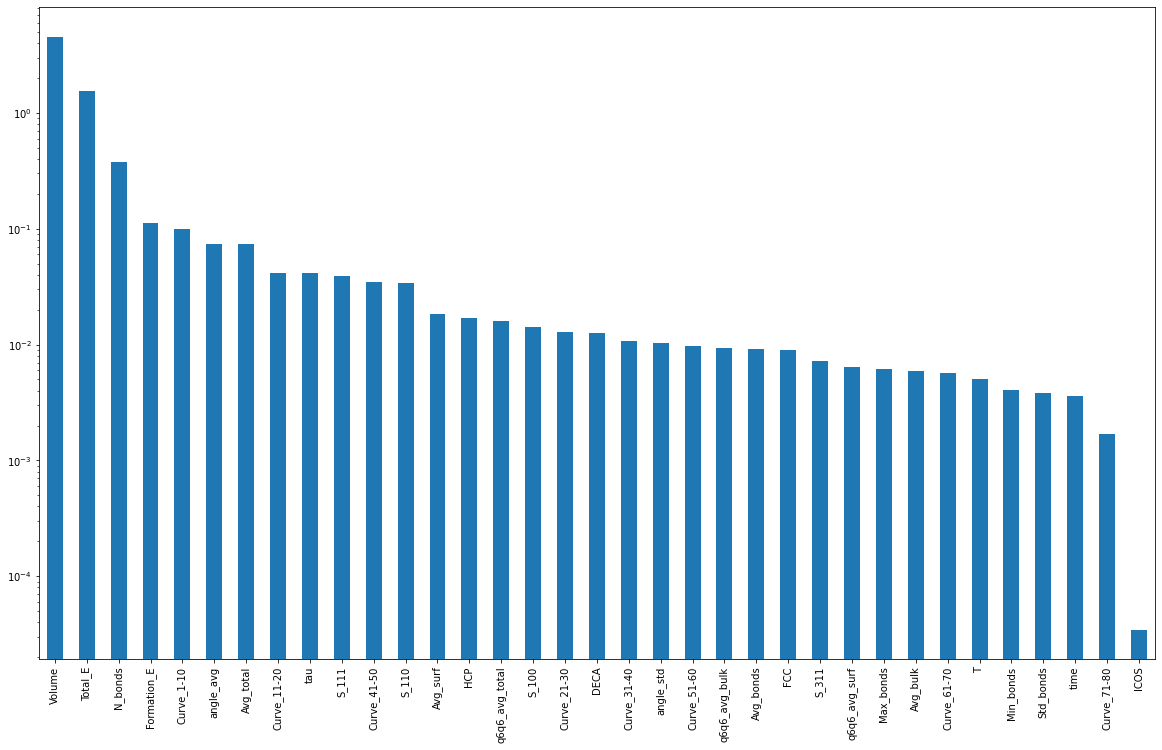

In [27]:
plt.figure(figsize=(20, 12))
shap_values_abs_df_describe_sorted.loc['mean'].plot(kind='bar',logy=True)
plt.show()

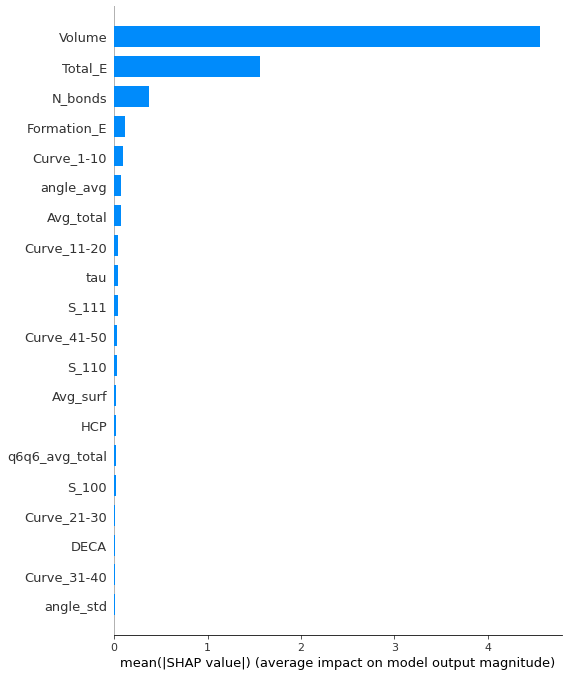

In [28]:
#SHAP API for the above bar plot -same results but nnot in log scale
shap.summary_plot(shap_values, features_test_df, plot_type="bar")

In [29]:
print(features_test.shape)
print(predictions_list['test'][0]) # predicted value
print(labels_test[0]) #original labels
print(set_d)

(400, 35)
19.609224
[19.7274]
['train', 'val', 'test']


In [30]:
test_residu = []
for i in range(labels_test.shape[0]):
    test_residu.append((labels_test[i] - predictions_list['test'][i])[0])

In [31]:
test_residu_np = np.array(test_residu)
test_residu_np_abs = np.abs(test_residu_np)
print(test_residu_np.shape)
print(test_residu_np_abs.sum()/400) #sanity test to check if we get the MAE loss correctly
sorted_indices = np.argsort(test_residu_np_abs)
print(sorted_indices[:10])

(400,)
0.10213178991699225
[373 312 192 171 353  91 210 254 361 105]


In [32]:
len(sorted_indices) #numbe of test samples
samples_ = (labels_test.shape[0]*10)//100 # number of samples for 10%
worst_set_ind = sorted_indices[-1*samples_:] # worst 10% - when ascending order based sorted, highest values are in the right side
best_set_ind = sorted_indices[:samples_] # best 10% - when ascending order based sorted, smallest values are to the left

#we need the corrosponding shap values
best_10 = shap_values[best_set_ind]
worst_10 = shap_values[worst_set_ind]

print(best_10.shape)
print(worst_10.shape)

best_10_values = test_residu_np[list(best_set_ind)] #best 10% of residual values - closest to zero
worst_10_values = test_residu_np[list(worst_set_ind)] #worst 10% of residual values - furthest from zero

print(best_10_values.shape)
print(worst_10_values.shape)

(40, 35)
(40, 35)
(40,)
(40,)


In [33]:
best_10_values

array([ 0.00046055, -0.00116579,  0.00153501,  0.00153616,  0.00160203,
       -0.00173619, -0.0019776 , -0.002117  ,  0.00275018, -0.00425226,
        0.00446761,  0.00449805, -0.00456775, -0.00457243,  0.00501118,
        0.00531543,  0.00551977, -0.00562543, -0.00633427, -0.00634446,
        0.00683995,  0.00728628,  0.00748959, -0.00810003, -0.00816681,
       -0.00927347,  0.00976124,  0.00993581,  0.00995419, -0.01005333,
        0.01077128, -0.01195165,  0.01214211,  0.01282486,  0.0129413 ,
       -0.01298568, -0.01309696,  0.01339538, -0.0137612 , -0.01451087])

In [34]:
worst_10_values

array([-0.24384619, -0.24513457, -0.24569365, -0.24611288, -0.24810068,
        0.25054673, -0.25859115,  0.26037285,  0.26091874,  0.26100566,
        0.26294986,  0.26687538,  0.26822122, -0.26874438, -0.27007858,
       -0.27037064, -0.27087878, -0.27289182,  0.28601516,  0.32757872,
        0.33356098, -0.33664886, -0.35948564,  0.37177306,  0.38364255,
        0.38417729, -0.40076989, -0.40141125,  0.41147097,  0.43635979,
       -0.4454145 ,  0.45666868, -0.4678057 ,  0.47285996,  0.49359183,
        0.57568929, -0.60341339,  0.61681154,  0.62931102,  0.9811889 ])

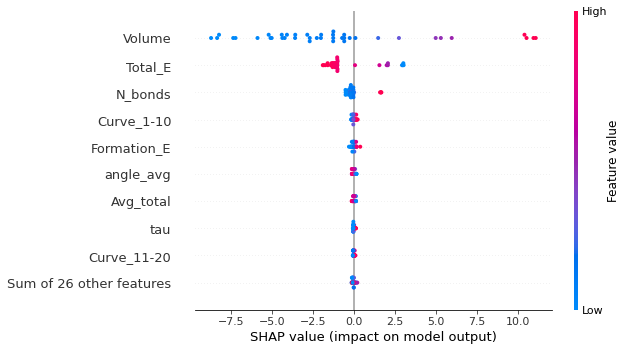

In [35]:
shap.plots.beeswarm(best_10,max_display=10)

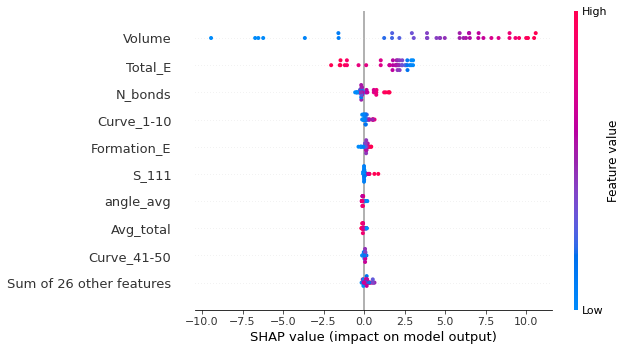

In [36]:
shap.plots.beeswarm(worst_10,max_display=10)

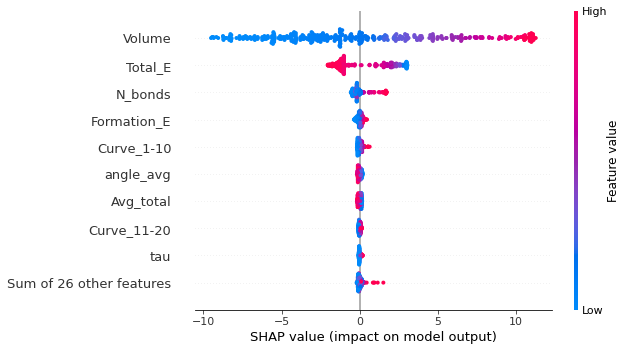

In [37]:
shap.plots.beeswarm(shap_values,max_display=10)

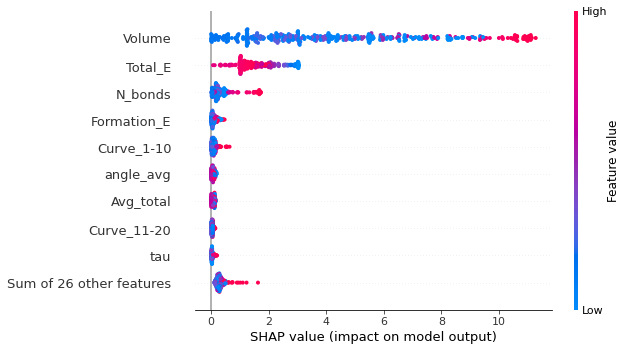

In [38]:
shap.plots.beeswarm(shap_values.abs, max_display=10)

In [39]:
print(labels_test[12])
print(labels_test[12] - predictions_list['test'][12])
print(predictions_list['test'][12])
print(sum(predictions_list['test'])/400)
# print(sum(labels_test)/400)

[17.5341]
[-0.05509334]
17.589193
21.413053612709046


In [40]:
features_num = best_10.shape[1]

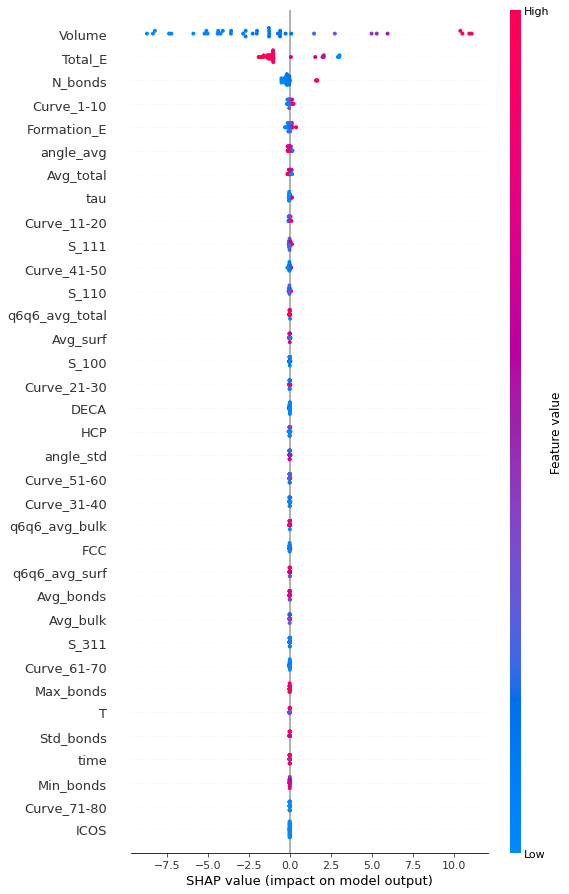

In [41]:
shap.plots.beeswarm(best_10,max_display=features_num)

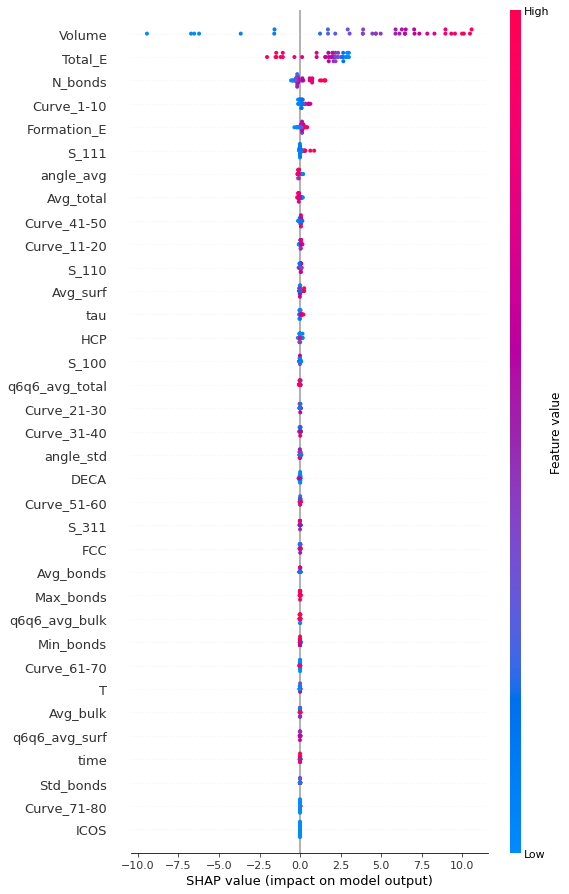

In [42]:
shap.plots.beeswarm(worst_10,max_display=features_num)

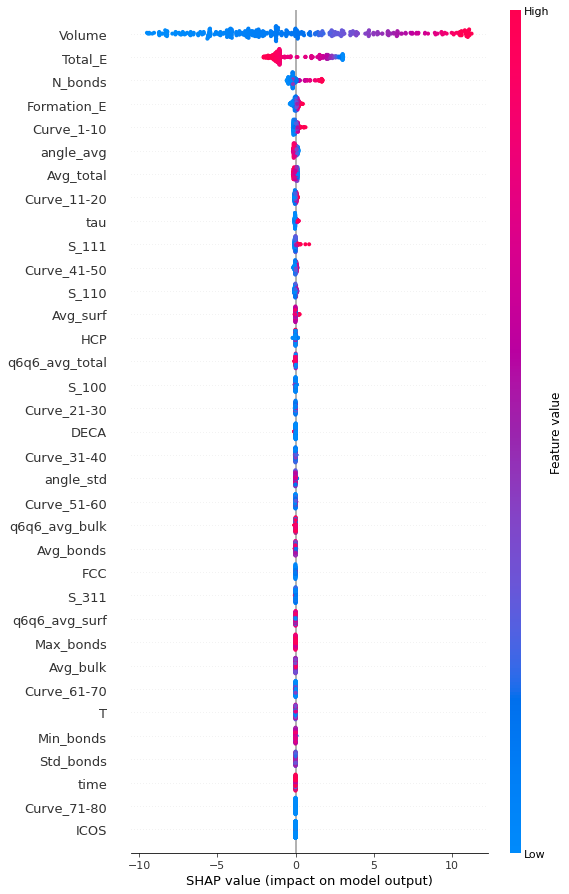

In [43]:
shap.plots.beeswarm(shap_values,max_display=features_num)

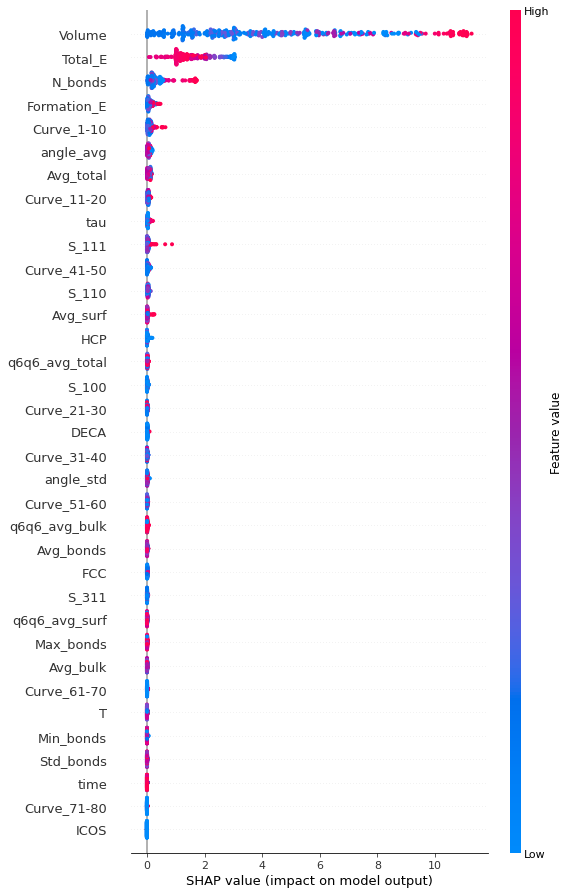

In [44]:
shap.plots.beeswarm(shap_values.abs, max_display=features_num)
